In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
#pip install segmentation_models

In [3]:
from segmentation_models.losses import bce_jaccard_loss,dice_loss
from segmentation_models.metrics import iou_score,f1_score

Segmentation Models: using `keras` framework.


 ## Importing the created Model

In [4]:
model=tf.keras.models.load_model('Updated_final_3.h5',custom_objects={'iou_score':iou_score,'f1-score':f1_score})

In [5]:
img=plt.imread('people-clothing-segmentation/jpeg_images/IMAGES/img_0001.jpeg')

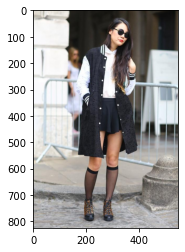

In [6]:
plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
data_gen=ImageDataGenerator(rescale=1/255)
mask_gen=ImageDataGenerator()

In [9]:
train=data_gen.flow_from_directory('New_Image_Mask_data',
                                  target_size=(320,160),
                                   shuffle=False,
                                  classes=['images'])
mask=data_gen.flow_from_directory('New_Image_Mask_data/',
                                  target_size=(320,160),
                                  shuffle=False,
                                  classes=['masks'])
path=pd.DataFrame()
path['train']=train.filepaths
path['mask']=mask.filepaths
train1=data_gen.flow_from_dataframe(path,x_col='train',
                                    target_size=(256,256),
                                    class_mode=None,
                                    shuffle=False,
                                   batch_size=2)
mask1=mask_gen.flow_from_dataframe(path,x_col='mask',
                                   target_size=(256,256),
                                   class_mode=None,
                                   shuffle=False,
                                  batch_size=2,
                                   classes=None,
                                  color_mode='grayscale')

Found 13752 images belonging to 1 classes.
Found 13752 images belonging to 1 classes.
Found 13752 validated image filenames.
Found 13752 validated image filenames.


In [10]:
x=model.predict(train1[1],verbose=1)

1/1 [==============================] - 3s 3s/step


In [11]:
pred_mask = tf.math.argmax(model.predict(train1[1]), axis=-1)

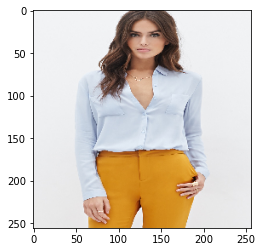

In [12]:
plt.imshow(train1[1][0])

## Predicted Mask

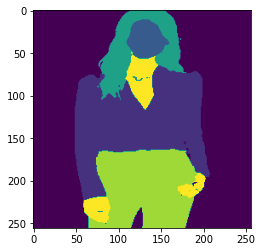

In [13]:
plt.imshow(pred_mask[0])

## True Mask

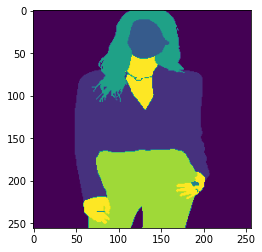

In [14]:
plt.imshow(mask1[1][0])

In [15]:
labels=pd.read_csv('people-clothing-segmentation/labels.csv',index_col=0)

In [16]:
np.unique(pred_mask[0])

array([0, 1, 2, 3, 4, 6, 7], dtype=int64)

In [17]:
map_img=np.zeros((256,256))
map_img[pred_mask[0]==6]=6

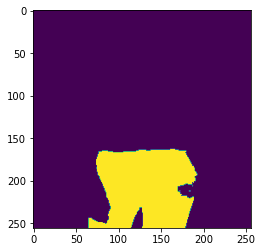

In [18]:
plt.imshow(map_img)

In [19]:
original=train1[1][0]

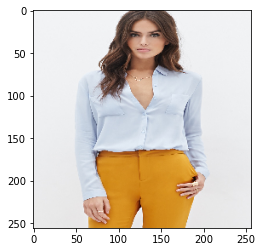

In [20]:
plt.imshow(original)

In [21]:
original[map_img!=0]=0

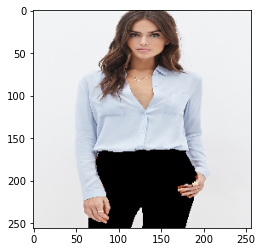

In [22]:
plt.imshow(original)

In [23]:
trail=np.zeros((16,256,256,3))

In [24]:
trail[0]=cv2.resize(plt.imread('images3.jpg'),(256,256))/255

In [25]:
pred_mask_ch = tf.math.argmax(model.predict(trail), axis=-1)

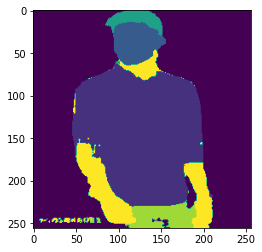

In [26]:
plt.imshow(pred_mask_ch[0])

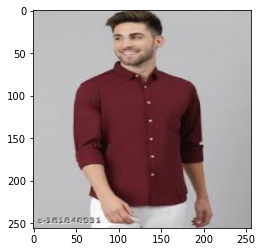

In [27]:
plt.imshow(trail[0])

In [28]:
ch=np.zeros((256,256,3))
ch[pred_mask_ch[0]==31]=31

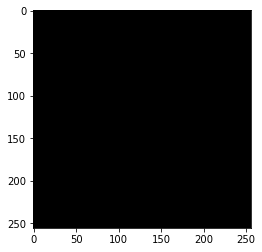

In [29]:
plt.imshow(ch)

In [30]:
img=cv2.resize(plt.imread('263fda7b525d07fcc7d83556c855e19b.jpg'),(544,800))

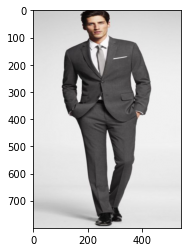

In [31]:
plt.imshow(img/255)

In [32]:
trail[0][ch!=31]=0

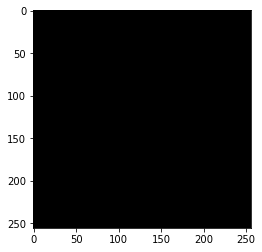

In [33]:
plt.imshow(trail[0])

In [34]:
jns=cv2.resize(plt.imread('images1.jpg'),(256,256))/255

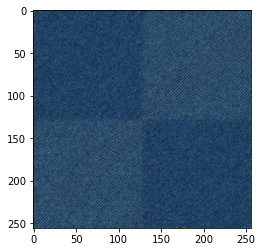

In [35]:
plt.imshow(jns)

In [36]:
res=np.where(original!=0,original,jns)

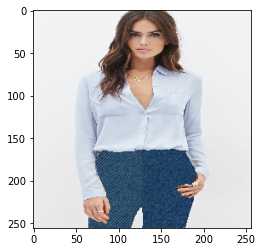

In [37]:
plt.imshow(res)

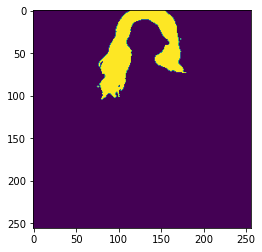

In [38]:
map_img=np.zeros((256,256))
map_img[pred_mask[0]==4]=4
plt.imshow(map_img)

In [39]:
original2=res
original2[map_img!=0]=0

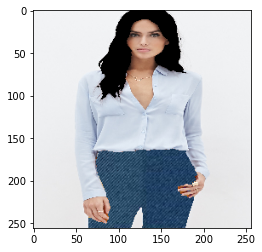

In [40]:
plt.imshow(original2)

In [41]:
jns=cv2.resize(plt.imread('1200px-Woman_with_long_brown_hair,_close-up_view.jpg'),(256,256))/255

In [42]:
res2=np.where(original2!=0,original2,jns)

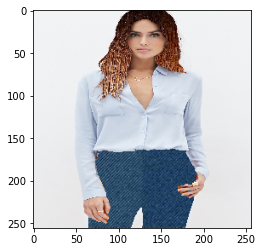

In [43]:
plt.imshow(res2)

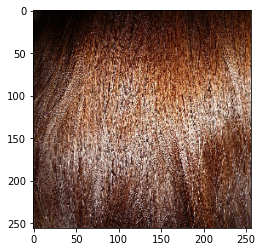

In [44]:
plt.imshow(jns)

In [45]:
height=256
width=256

In [46]:
def resize_scale(image,height,width):
    return cv2.resize(image,(width,height))/255

In [47]:
def get_class_names(masks,labes):
    lis=np.unique(masks)
    for i in lis:
        print(str(labels.iloc[i].values[0])+' : '+str(i))

In [48]:
def make_mask(prediction):
    pred_mask=pred_mask_ch = tf.math.argmax(prediction, axis=-1)
    return pred_mask

In [49]:
def get_class_mask(mask,m_class,height,width):
    map_img=np.zeros((height,width))
    map_img[mask==m_class]=m_class
    return map_img

In [50]:
def get_original_fit(original,class_img,map_img_path,height,width):
    img=resize_scale(original,height,width)*255
    map_img=plt.imread(map_img_path)
    map_img=resize_scale(map_img,height,width)
    img[class_img!=0]=0
    res=np.where(img!=0,img,map_img)
    return res

In [51]:
mask=model.predict(train1[0])

In [52]:
masks=make_mask(mask)

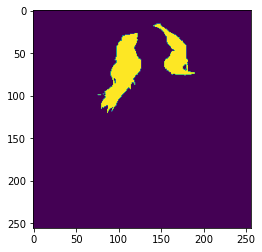

In [53]:
class_img=get_class_mask(masks[0],4,height,width)
plt.imshow(class_img)

In [54]:
result=get_original_fit(train1[0][0],class_img,'images.jpg',height,width)

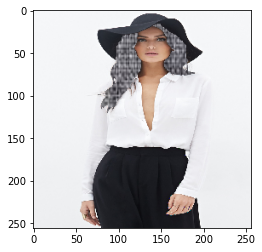

In [55]:
plt.imshow(result)

In [56]:
get_class_names(masks[0],labels)

nan : 0
accessories : 1
bag : 2
belt : 3
blazer : 4
blouse : 5
bodysuit : 6
boots : 7


In [57]:
# import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    frame=resize_scale(frame,256,256) # Resize Frame
    #bath_img=np.zeros((32,256,256,3))
    #bath_img[0]=frame
    x=np.zeros((1,256,256,3))
    x[0]=frame
    
    # Prediction
    mask=model.predict(x,batch_size=19,verbose=0)
    masks=make_mask(mask)
    class_img=get_class_mask(masks,4,height,width)
    result=get_original_fit(frame,class_img,'images.jpg',height,width)
  
    # Display the resulting frame
    cv2.imshow('frame',result)
      
    # the 'q' button is set as the
    # quitting button you may use anyq
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

C:\Users\vikas.reddy\AppData\Local\Temp\ipykernel_10920\605404312.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  map_img[mask==m_class]=m_class


In [58]:
labels

,label_list
0,NaN
1,accessories
2,bag
3,belt
4,blazer
5,blouse
6,bodysuit
7,boots
8,bra
9,bracelet


In [59]:
keras.__version__

NameError: name 'keras' is not defined

In [ ]:
import keras

In [ ]:
tf.__version__

In [ ]:
# Streamlit 